<a href="https://colab.research.google.com/github/Ale020709/prueba1/blob/main/TRABAJO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os

In [ ]:
img_size = (64,64)
batch_size = 32

In [ ]:
train = ImageDataGenerator(rescale=1./255)
test  = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train.flow_from_directory('/content/drive/MyDrive/DIPLOMADO/MY_data/train',
                                            target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test.flow_from_directory('/content/drive/MyDrive/DIPLOMADO/MY_data/test',
                                          target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 690 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


Found 690 images belonging to 3 classes.


In [ ]:
print('Forma Datos de entrenamiento:', X_train.shape)
print('Forma etiquetas de entrenamiento:', y_train.shape)
print('Forma Datos prueba:', X_test.shape)
print('Formas etiquetas de prueba', y_test.shape)

In [ ]:
# modelo

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 441ms/step - accuracy: 0.9760 - loss: 0.1159 - val_accuracy: 0.3633 - val_loss: 2.4430
Epoch 2/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - accuracy: 0.9543 - loss: 0.1431 - val_accuracy: 0.3633 - val_loss: 2.6495
Epoch 3/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 332ms/step - accuracy: 0.9842 - loss: 0.0680 - val_accuracy: 0.3733 - val_loss: 3.2208
Epoch 4/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 398ms/step - accuracy: 0.9899 - loss: 0.0384 - val_accuracy: 0.3433 - val_loss: 3.7050
Epoch 5/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 1.0000 - loss: 0.0170 - val_accuracy: 0.4300 - val_loss: 4.0660
Epoch 6/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 397ms/step - accuracy: 0.9918 - loss: 0.0316 - val_accuracy: 0.3833 - val_loss: 4.0143


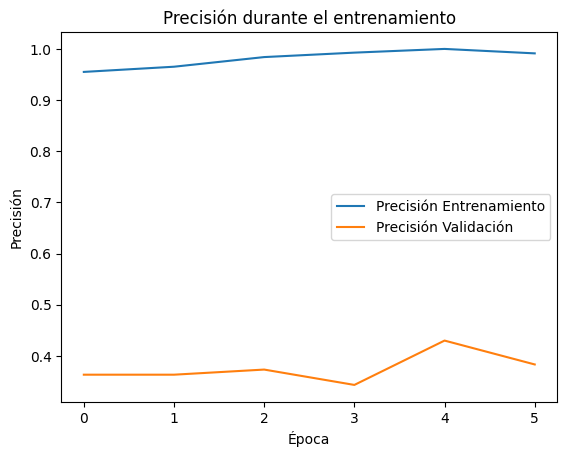

In [ ]:
# Entrenamiento
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=6
)

# Graficar resultados
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [ ]:

predict_folder = '/content/drive/MyDrive/DIPLOMADO/MY_data/predict'
class_names = list(train_generator.class_indices.keys())

for img_file in os.listdir(predict_folder):
    img_path = os.path.join(predict_folder, img_file)
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    print(f"Imagen: {img_file} → Predicción: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Imagen: 1.jpeg → Predicción: Apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Imagen: 3.jpeg → Predicción: Apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Imagen: 2.jpeg → Predicción: avocado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Imagen: 0.jpeg → Predicción: Apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Imagen: img_11.jpeg → Predicción: avocado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Imagen: img_41.jpeg → Predicción: avocado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Imagen: 4.jpeg → Predicción: Banana
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Imagen: img_191.jpeg → Predicción: Banana
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Imagen: img_171.jpeg → Predicción: Banana
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Imagen: img_21.jpeg → Predicción: Apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Imagen: img_01.jpeg → Predicción: Banana
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Imagen: img_121.jpeg → Predicción: Banana
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Imagen: img_141.jpeg → Predicción: Ba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


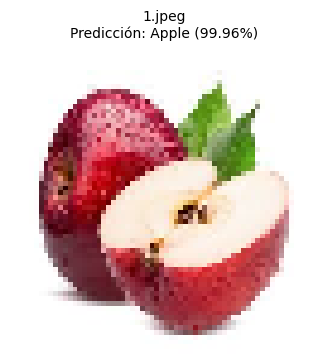

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


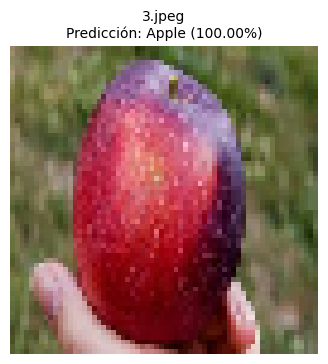

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


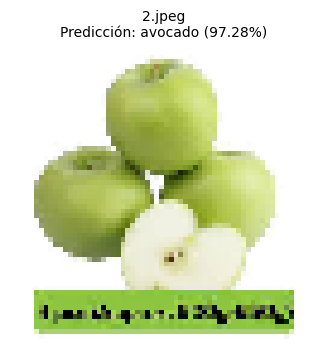

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


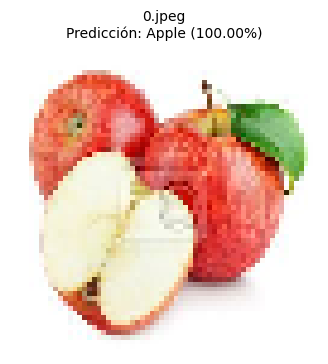

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


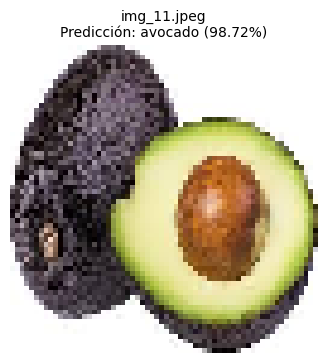

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


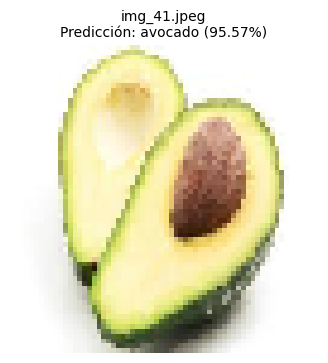

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


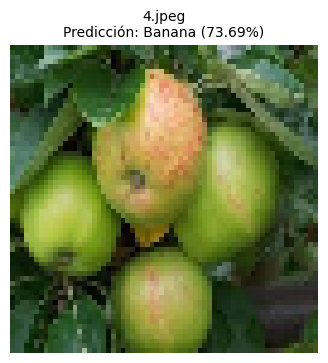

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


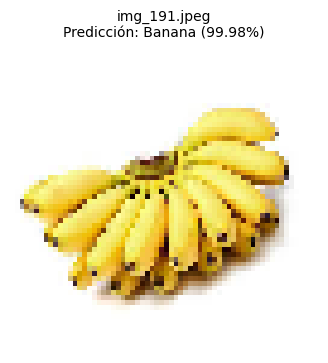

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


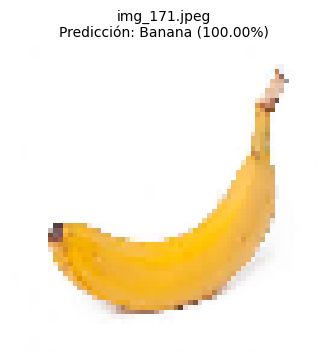

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


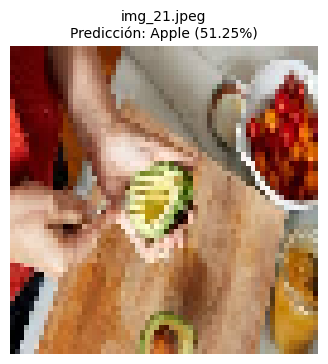

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


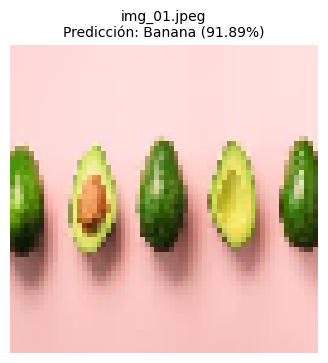

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


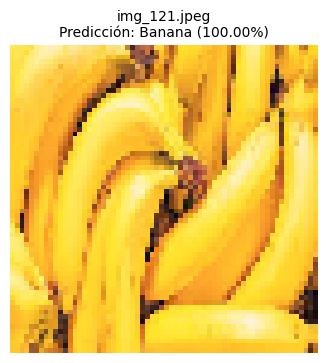

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


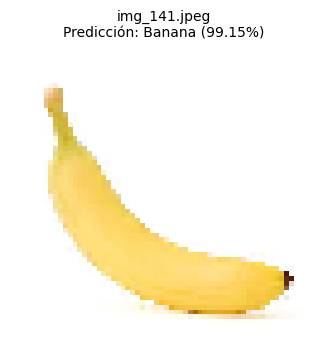

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


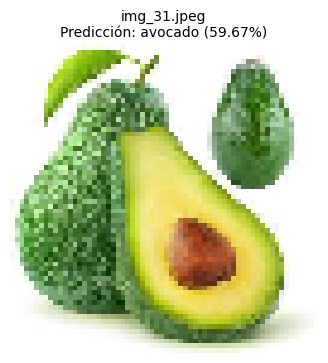

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

predict_folder = '/content/drive/MyDrive/DIPLOMADO/MY_data/predict'
class_names = list(train_generator.class_indices.keys())

# Iterar sobre cada imagen en la carpeta
for img_file in os.listdir(predict_folder):
    if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):

        img_path = os.path.join(predict_folder, img_file)

        # Cargar y preprocesar la imagen
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predicción
        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        # Mostrar la imagen con predicción
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(f"{img_file}\nPredicción: {predicted_class} ({confidence:.2f}%)", fontsize=10)
        plt.axis('off')
        plt.show()
